In [57]:
!pip install opencv-python


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\vyash\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [58]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

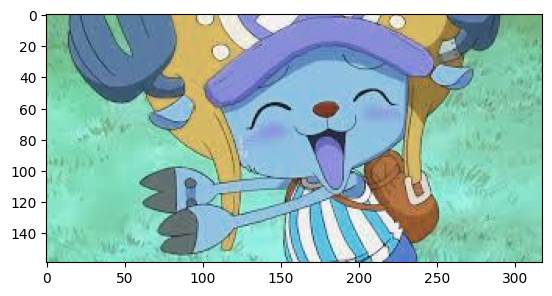

In [59]:
img = cv2.imread('chopper.jpeg')
plt.imshow(img)
plt.show()

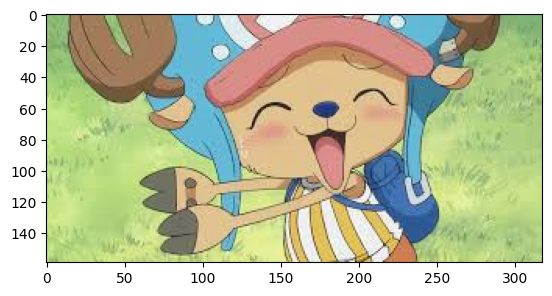

In [60]:
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [61]:
img_rgb.shape

(159, 318, 3)

In [62]:
type(img_rgb)

numpy.ndarray

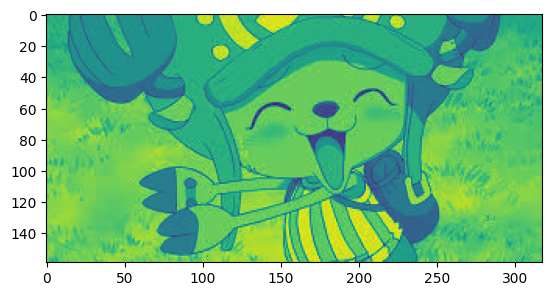

In [63]:
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)
plt.show()

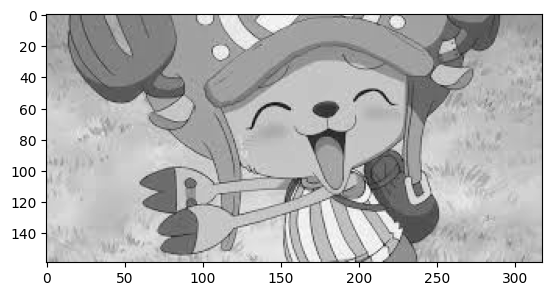

In [64]:
plt.imshow(img_gray,cmap='gray') #specify the color map as gray
plt.show()

In [65]:
img_gray.shape

(159, 318)

In [66]:
type(img_gray)

numpy.ndarray

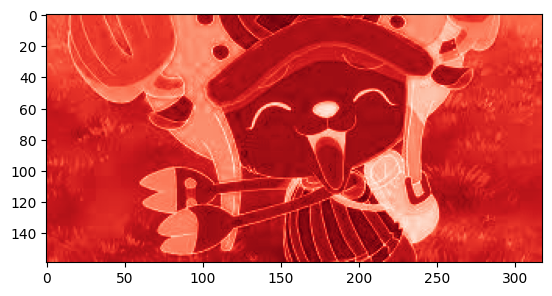

In [67]:
plt.imshow(img_rgb[:,:,0],cmap='Reds')
plt.show()#red channel

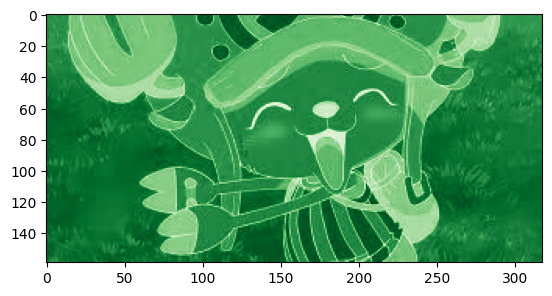

In [68]:
plt.imshow(img_rgb[:,:,1],cmap='Greens')
plt.show()

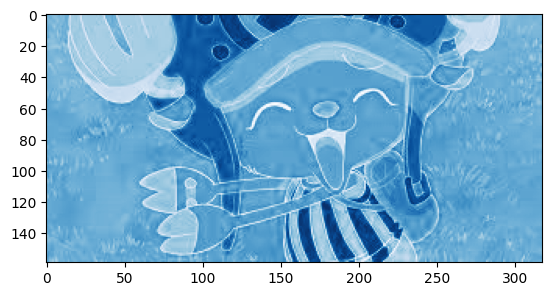

In [69]:
plt.imshow(img_rgb[:,:,2],cmap='Blues')
plt.show()

In [70]:
resized_img = cv2.resize(img_rgb,(300,300))
resized_img.shape

(300, 300, 3)

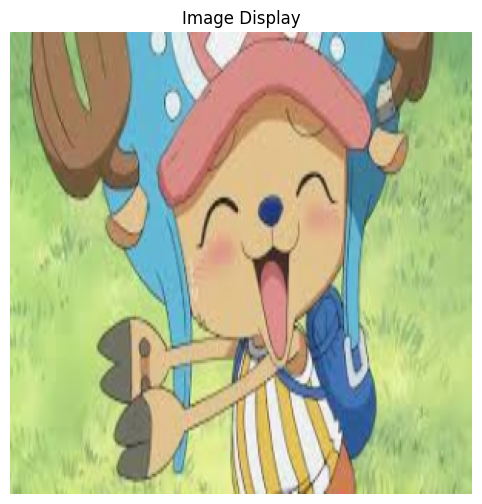

In [71]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111)
ax.imshow(resized_img)
ax.axis('off')
ax.set_title("Image Display") #set a little for the subplot

plt.show()

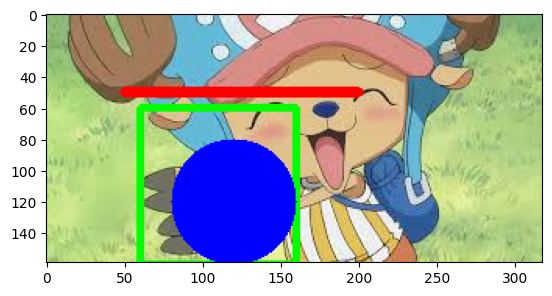

In [72]:
cv2.line(img_rgb, (50, 50), (200, 50), (255, 0, 0), 5)
cv2.rectangle(img_rgb, (60, 60), (160, 160), (0, 255, 0), 3)
cv2.circle(img_rgb, (120, 120), 40, (0, 0, 255), -1)
plt.imshow(img_rgb)
plt.show()


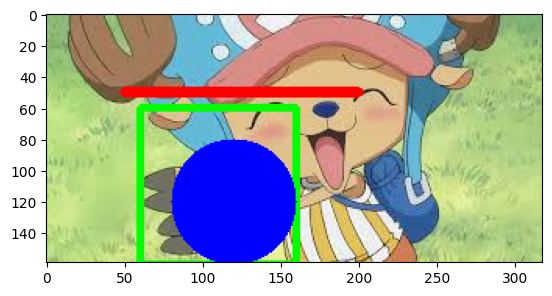

In [73]:
plt.imshow(img_rgb)
plt.show()

(159, 318, 3)


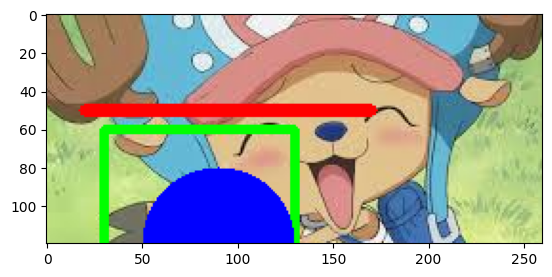

In [74]:
#modify the position of the dog by manipulating its coordinates
print(img_rgb.shape)
plt.imshow(img_rgb[:120,30:290])

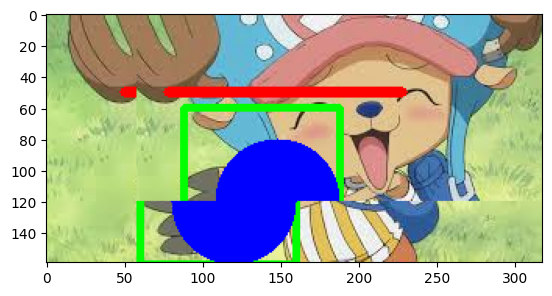

In [75]:
roi = img_rgb[:120, 30:290]
top_left_x = img_rgb.shape[1] - roi.shape[1]
img_rgb_copy = img_rgb.copy()
img_rgb_copy[0:roi.shape[0], top_left_x:top_left_x + roi.shape[1]] = roi
plt.imshow(img_rgb_copy)
plt.show()


In [76]:
# add an average filter in the image

def apply_average_filter(img, kernel_size=(3, 3)):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if img is None:
        print("Error: Could not load image")
        return None
    kernel = np.ones(kernel_size) / (kernel_size[0] * kernel_size[1])

    filtered_img = cv2.filter2D(img, -1, kernel)
    return filtered_img

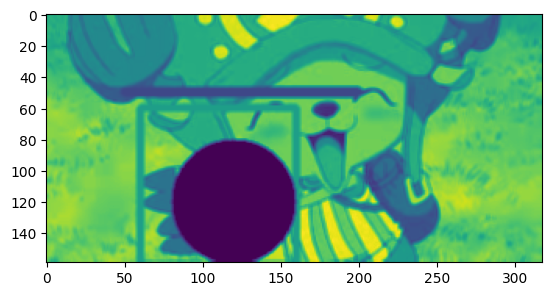

In [77]:
filter_img = apply_average_filter(img_rgb)
plt.imshow(filter_img)
plt.show()

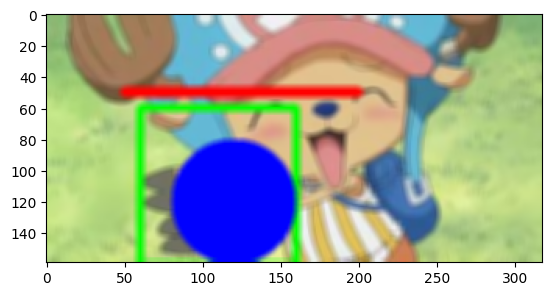

In [78]:
# apply filter 1. to blur image -> a. gussian filter and simplr blur filter
# apply filter for age detection 

# BLUR

img_simple_blur = cv2.blur(img_rgb,(5,5))
plt.imshow(img_simple_blur)
plt.show()

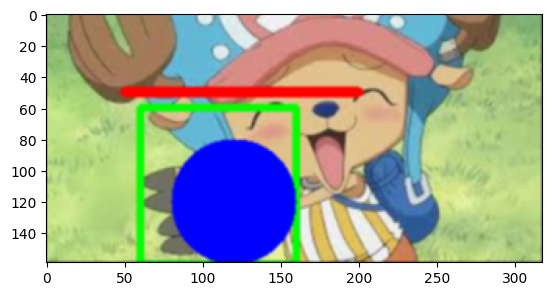

In [79]:
filter = np.array([
    [1,2,1],
    [2,4,2],
    [1,2,1]
] , dtype=np.float32)

h,w,c = img_rgb.shape

filter /= np.sum(filter)

padded_img = np.zeros((h + 2, w + 2, c), dtype=np.uint8)
padded_img[1:h+1, 1:w+1] = img_rgb

blur_img = np.zeros_like(img_rgb, dtype=np.uint8)

for i in range(1,h+1):
    for j in range(1,w+1):
        for k in range(c):

            area = padded_img[i-1:i+2, j-1:j+2, k]
            blur = np.sum(area * filter)

            blur_img[i-1,j-1,k] = min(255,max(0,int(blur)))

plt.imshow(blur_img)

[]

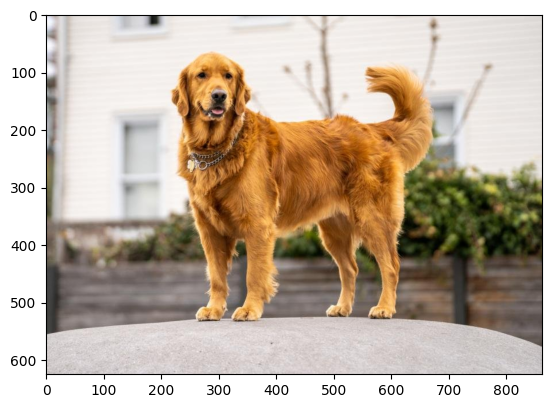

In [80]:
# take 2 images , 1st image of the dog and 2nd image of the horse and generate 2 new images having dog contains horse head and vice versa 


dog = cv2.imread('dog.jpeg')
horse = cv2.imread('horse.jpeg')
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

plt.imshow(dog)
plt.plot()


[]

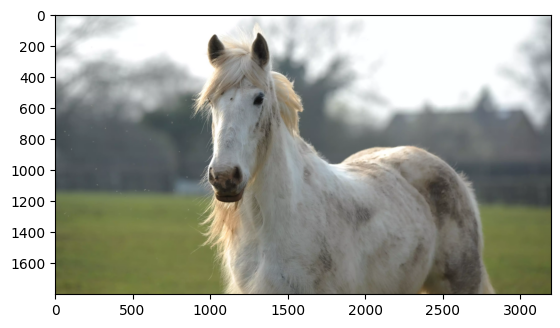

In [81]:
horse = cv2.cvtColor(horse,cv2.COLOR_BGR2RGB)

plt.imshow(horse)
plt.plot()


In [90]:
dog_head = (dog[60:190,200:370])


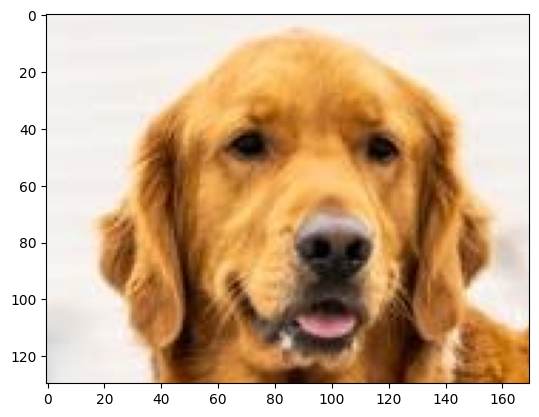

In [91]:
plt.imshow(dog_head)

In [87]:
horse_head = (horse[100:1250,750:1500])

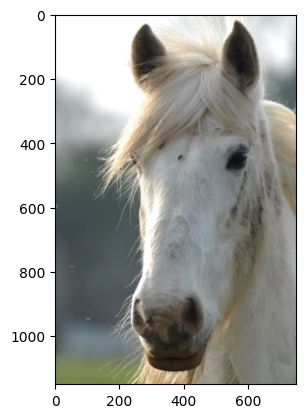

In [88]:
plt.imshow(horse_head)

In [92]:
resized_horse_head = cv2.resize(horse_head, (170, 130))  # Resizing horse head to fit dog's head
resized_dog_head = cv2.resize(dog_head, (750, 1150))

In [93]:
dog_with_horse_head = dog.copy()
horse_with_dog_head = horse.copy()

In [94]:
dog_with_horse_head[60:190, 200:370] = resized_horse_head
horse_with_dog_head[100:1250, 750:1500] = resized_dog_head

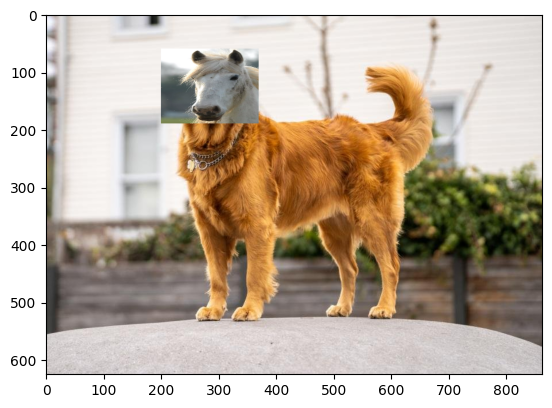

In [95]:
plt.imshow(dog_with_horse_head)

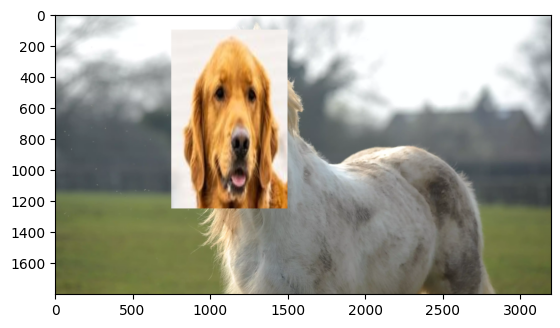

In [97]:
plt.imshow(horse_with_dog_head)